In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                        columns=np.append(wine['feature_names'], 'target'))

In [3]:
# Feature selection and feature engineering
features = wine['feature_names']

In [4]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(wine_df, test_size=0.2, random_state=42)

In [5]:
# Preprocessing
def preprocess_data(data, features):
    X = data[features]
    y = data['target']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

In [12]:
# Train a RandomForestClassifier model
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

In [7]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

In [8]:
# Model tweaking, regularization, and hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
    }
    rf_model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [9]:
# Making Predictions with test data
def make_predictions(model, X_test, features):
    predictions = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': test_data['target'].values, 'Predicted': predictions})
    results_df['Class'] = results_df['Actual'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
    results_df['Predicted_Class'] = results_df['Predicted'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
    return results_df

In [10]:
# Preprocess the training data
X_train_scaled, y_train = preprocess_data(train_data, features)

In [13]:
# Train a RandomForestClassifier model
rf_model = train_random_forest(X_train_scaled, y_train)

In [14]:
# Evaluate the model
X_test_scaled, y_test = preprocess_data(test_data, features)
accuracy, report, confusion_matrix = evaluate_model(rf_model, X_test_scaled, y_test)
print(f'Accuracy of the model on the test set: {accuracy:.2f}')
print('\nClassification Report:')
print(report)
print('\nConfusion Matrix:')
print(confusion_matrix)

Accuracy of the model on the test set: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [15]:
# Hyperparameter tuning
best_params = hyperparameter_tuning(X_train_scaled, y_train)
print('\nBest Hyperparameters:', best_params)


Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}


In [16]:
# Make predictions with test data
results_df = make_predictions(rf_model, X_test_scaled, features)
print('\nTest Data Predictions:')
print(results_df)


Test Data Predictions:
    Actual  Predicted    Class Predicted_Class
0      0.0        0.0  class_0         class_0
1      0.0        0.0  class_0         class_0
2      2.0        2.0  class_2         class_2
3      0.0        0.0  class_0         class_0
4      1.0        1.0  class_1         class_1
5      0.0        0.0  class_0         class_0
6      1.0        1.0  class_1         class_1
7      2.0        2.0  class_2         class_2
8      1.0        1.0  class_1         class_1
9      2.0        2.0  class_2         class_2
10     0.0        0.0  class_0         class_0
11     2.0        2.0  class_2         class_2
12     0.0        0.0  class_0         class_0
13     1.0        1.0  class_1         class_1
14     0.0        0.0  class_0         class_0
15     1.0        1.0  class_1         class_1
16     1.0        1.0  class_1         class_1
17     1.0        1.0  class_1         class_1
18     0.0        0.0  class_0         class_0
19     1.0        1.0  class_1      

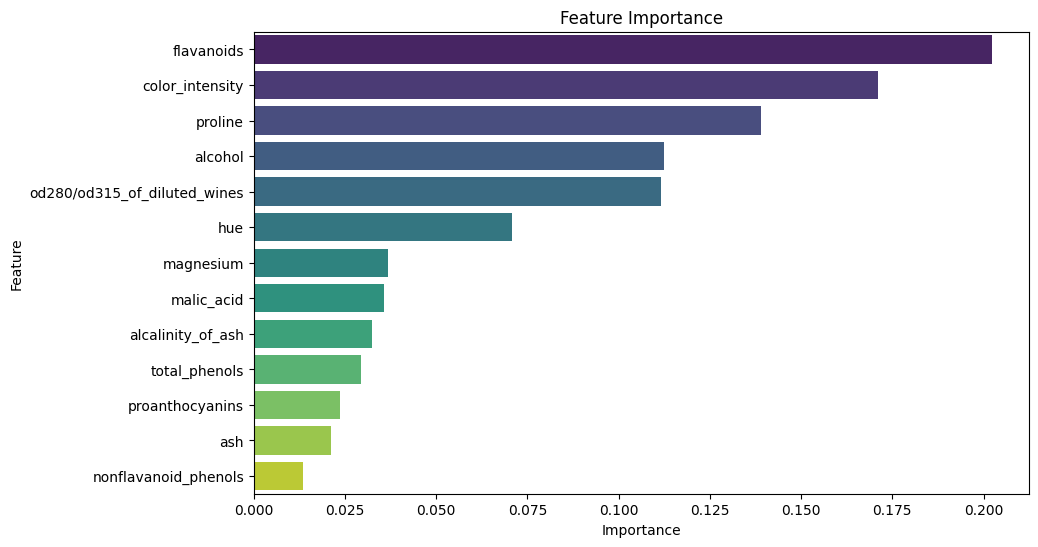

In [17]:
# Visualize feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()